In [1]:
Observed Trend 1: Temperature of the cities near the equator are comparetively high
Observed Trend 2: more cities on the north of the equator seem to be cloudy than the cities below the equator
Observed Trend 3: wind_speeds seem to be low during this time of the year

In [ ]:
import requests as req
import json
import pandas as pd
import numpy as np
import seaborn as sns
from citipy import citipy
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#get date info
date = datetime.today()
cur_date = date.strftime('%m/%d/%Y')

In [3]:
#get city name
lat = []
n = range(-90,90,7)
m = range(-180,180,9)

for row in n:
    for col in m:

        city = citipy.nearest_city(row, col)
        name = city.city_name
       
        
        if name not in lat:
            lat.append(name)

In [4]:
#convert to dataframe
lat_df = pd.DataFrame(lat)
lat_df = lat_df.rename(columns={ 0 :"cities"})
lat_df.head()

,cities
0,vaini
1,mataura
2,rikitea
3,punta arenas
4,ushuaia


In [5]:
#add other elements to the DataFrame
lat_df['country'] = ''
lat_df['latitude'] = ''
lat_df['longitude'] = ''
lat_df['date'] = ''
lat_df['max_temp'] = ''
lat_df['cloudliness'] = ''
lat_df['humidity'] = ''
lat_df['wind_speed'] = ''
lat_df.head()

,cities,country,latitude,longitude,date,max_temp,cloudliness,humidity,wind_speed
0,vaini,,,,,,,,
1,mataura,,,,,,,,
2,rikitea,,,,,,,,
3,punta arenas,,,,,,,,
4,ushuaia,,,,,,,,


In [29]:
#Retrieve data from open weather app
url = 'http://api.openweathermap.org/data/2.5/weather/'
api_key = 'ed650edd6897d1ef4bdb210831a4c16e'
params = {'appid': api_key,
            'q': '',
            'units': 'imperial'}

for index,city in lat_df.iterrows():
    params['q'] = f'{city["cities"]}'
    response = req.get(url, params=params).json()
    print(f'Retrieving info off # {index} {city["cities"]}. url: {url}?APPID=api_key={params["q"]}&units={params["units"]}')
    
    try:

        latitude = response['coord']['lat']
        #temp_data.append(response['main']['temp'])
        longitude = response['coord']['lon']
        temp = response['main']['temp_max']
        humidity = response['main']['humidity']
        country = response['sys']['country']
        date = response['dt']
        wind_speed = response['wind']['speed']
        cloudliness = response['clouds']['all']
        
        lat_df.set_value(index, 'country', country)
        lat_df.set_value(index, 'latitude', latitude)
        lat_df.set_value(index, 'longitude', longitude)
        lat_df.set_value(index, 'date', date)
        lat_df.set_value(index, 'max_temp', temp)
        lat_df.set_value(index, 'cloudliness', cloudliness)
        lat_df.set_value(index, 'humidity', humidity)
        lat_df.set_value(index, 'wind_speed', wind_speed)
    
    except:
        
        lat_df.set_value(index, 'max_temp', np.nan)
        lat_df.set_value(index, 'humidity', np.nan)
        lat_df.set_value(index, 'cloudliness', np.nan)
        lat_df.set_value(index, 'wind_speed', np.nan)
        lat_df.set_value(index, 'country', np.nan)
        lat_df.set_value(index, 'latitude', np.nan)
        lat_df.set_value(index, 'longitude', np.nan)
        lat_df.set_value(index, 'date', np.nan)

lat_df.head()
   

Retrieving info off # 0 vaini. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=vaini&units=imperial
Retrieving info off # 1 mataura. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=mataura&units=imperial
Retrieving info off # 2 rikitea. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=rikitea&units=imperial
Retrieving info off # 3 punta arenas. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=punta arenas&units=imperial
Retrieving info off # 4 ushuaia. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=ushuaia&units=imperial
Retrieving info off # 5 hermanus. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=hermanus&units=imperial
Retrieving info off # 6 bredasdorp. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=bredasdorp&units=imperial
Retrieving info off # 7 port elizabeth. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=port elizabeth&uni

Retrieving info off # 64 tres passos. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=tres passos&units=imperial
Retrieving info off # 65 sao sebastiao. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=sao sebastiao&units=imperial
Retrieving info off # 66 vila velha. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=vila velha&units=imperial
Retrieving info off # 67 keetmanshoop. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=keetmanshoop&units=imperial
Retrieving info off # 68 viljoenskroon. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=viljoenskroon&units=imperial
Retrieving info off # 69 xai-xai. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=xai-xai&units=imperial
Retrieving info off # 70 saint-joseph. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=saint-joseph&units=imperial
Retrieving info off # 71 grand river south east. url: http://api.openweath

Retrieving info off # 128 milingimbi. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=milingimbi&units=imperial
Retrieving info off # 129 daru. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=daru&units=imperial
Retrieving info off # 130 samarai. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=samarai&units=imperial
Retrieving info off # 131 kirakira. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=kirakira&units=imperial
Retrieving info off # 132 sola. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=sola&units=imperial
Retrieving info off # 133 vaitupu. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=vaitupu&units=imperial
Retrieving info off # 134 saleaula. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=saleaula&units=imperial
Retrieving info off # 135 samusu. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=samusu&units=imperial
Retr

Retrieving info off # 194 la colorada. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=la colorada&units=imperial
Retrieving info off # 195 san juan de colon. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=san juan de colon&units=imperial
Retrieving info off # 196 ciudad guayana. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=ciudad guayana&units=imperial
Retrieving info off # 197 mana. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=mana&units=imperial
Retrieving info off # 198 saint-georges. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=saint-georges&units=imperial
Retrieving info off # 199 itarema. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=itarema&units=imperial
Retrieving info off # 200 sao filipe. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=sao filipe&units=imperial
Retrieving info off # 201 bubaque. url: http://api.openweathermap.org/d

Retrieving info off # 258 gat. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=gat&units=imperial
Retrieving info off # 259 faya. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=faya&units=imperial
Retrieving info off # 260 marawi. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=marawi&units=imperial
Retrieving info off # 261 sawakin. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=sawakin&units=imperial
Retrieving info off # 262 riyadh. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=riyadh&units=imperial
Retrieving info off # 263 abu dhabi. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=abu dhabi&units=imperial
Retrieving info off # 264 gwadar. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=gwadar&units=imperial
Retrieving info off # 265 dhola. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=dhola&units=imperial
Retrieving info off 

Retrieving info off # 324 damghan. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=damghan&units=imperial
Retrieving info off # 325 murgab. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=murgab&units=imperial
Retrieving info off # 326 chitral. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=chitral&units=imperial
Retrieving info off # 327 leh. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=leh&units=imperial
Retrieving info off # 328 lasa. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=lasa&units=imperial
Retrieving info off # 329 xining. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=xining&units=imperial
Retrieving info off # 330 pingliang. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=pingliang&units=imperial
Retrieving info off # 331 taian. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=taian&units=imperial
Retrieving info of

Retrieving info off # 389 svetlyy. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=svetlyy&units=imperial
Retrieving info off # 390 shakhtinsk. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=shakhtinsk&units=imperial
Retrieving info off # 391 shar. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=shar&units=imperial
Retrieving info off # 392 mugur-aksy. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=mugur-aksy&units=imperial
Retrieving info off # 393 moron. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=moron&units=imperial
Retrieving info off # 394 bichura. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=bichura&units=imperial
Retrieving info off # 395 dauriya. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=dauriya&units=imperial
Retrieving info off # 396 nenjiang. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=nenjiang&units=imper

Retrieving info off # 454 muravlenko. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=muravlenko&units=imperial
Retrieving info off # 455 krasnoselkup. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=krasnoselkup&units=imperial
Retrieving info off # 456 turukhansk. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=turukhansk&units=imperial
Retrieving info off # 457 tura. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=tura&units=imperial
Retrieving info off # 458 yerbogachen. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=yerbogachen&units=imperial
Retrieving info off # 459 nyurba. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=nyurba&units=imperial
Retrieving info off # 460 sangar. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=sangar&units=imperial
Retrieving info off # 461 khandyga. url: http://api.openweathermap.org/data/2.5/weather/?APPID=api_key=kh

,cities,country,latitude,longitude,date,max_temp,cloudliness,humidity,wind_speed
0,vaini,TO,-21.2,-175.2,1512334800,78.8,75,88,10.29
1,mataura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,rikitea,PF,-23.12,-134.97,1512338185,76.6,76,100,17.83
3,punta arenas,CL,-53.15,-70.92,1512334800,60.8,75,44,19.46
4,ushuaia,AR,-54.8,-68.3,1512334800,64.4,75,45,9.17


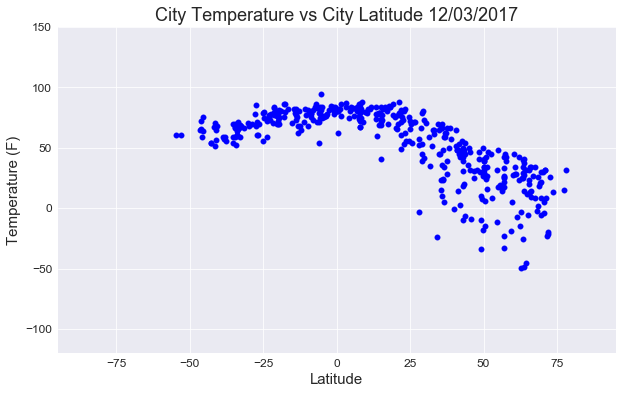

In [25]:
# plot temperature in relation to latitude
# change plot size
fig = plt.figure(figsize=(10, 6))

# change plot style
sns.set()
sns.set_context("paper")

# plot data
plt.scatter(lat_df['latitude'], lat_df['max_temp'], color="blue")

# change x-axis limit
plt.xlim(-95, 95)
plt.ylim(-120,150)

# adjust font size of axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add title and labels to axes
plt.title(f'City Temperature vs City Latitude {cur_date}', fontsize=18)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Temperature (F)', fontsize=15)
plt.show()


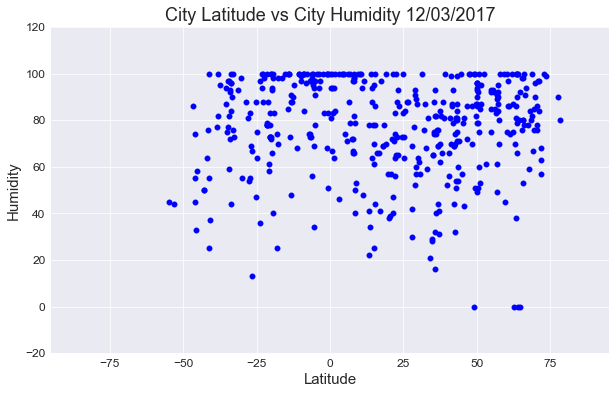

In [30]:
# plot temperature in relation to latitude
# change plot size
fig = plt.figure(figsize=(10, 6))

# change plot style
sns.set()
sns.set_context("paper")

# plot data
plt.scatter(lat_df['latitude'], lat_df['humidity'], color="blue")

# change x-axis limit
plt.xlim(-95, 95)
plt.ylim(-20,120)

# adjust font size of axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add title and labels to axes
plt.title(f'City Latitude vs City Humidity {cur_date}', fontsize=18)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Humidity', fontsize=15)
plt.show()



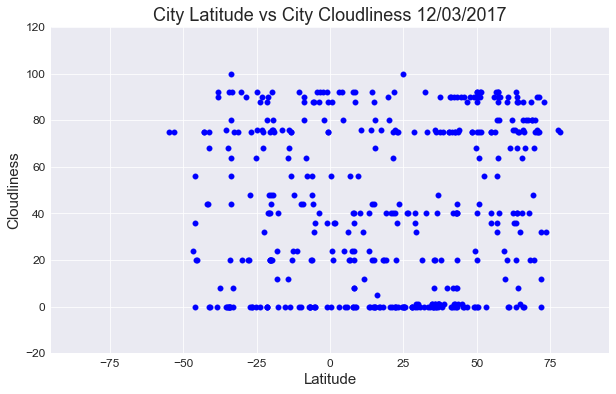

In [23]:
# plot temperature in relation to latitude
# change plot size
fig = plt.figure(figsize=(10, 6))

# change plot style
sns.set()
sns.set_context("paper")

# plot data
plt.scatter(lat_df['latitude'], lat_df['cloudliness'], color="blue")

# change x-axis limit
plt.xlim(-95, 95)
plt.ylim(-20,120)

# adjust font size of axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add title and labels to axes
plt.title(f'City Latitude vs City Cloudliness {cur_date}', fontsize=18)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Cloudliness', fontsize=15)
plt.show()


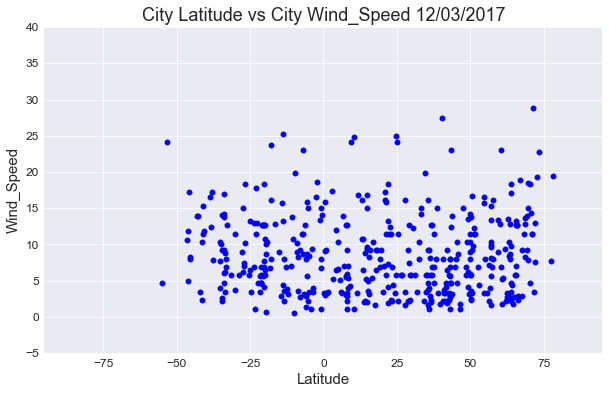

In [24]:
# plot temperature in relation to latitude
# change plot size
fig = plt.figure(figsize=(10, 6))

# change plot style
sns.set()
sns.set_context("paper")

# plot data
plt.scatter(lat_df['latitude'], lat_df['wind_speed'], color="blue")

# change x-axis limit
plt.xlim(-95, 95)
plt.ylim(-5,40)

# adjust font size of axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add title and labels to axes
plt.title(f'City Latitude vs City Wind_Speed {cur_date}', fontsize=18)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Wind_Speed', fontsize=15)
plt.show()

# save and show plot
# plt.savefig('Temperature_v_Lattitude.png')
# plt.show()